In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\Rohith\Downloads\moda.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
print(df.shape)
print(df.columns)

(6362620, 11)
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


f

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
LE=LabelEncoder()
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df['nameOrig']=LE.fit_transform(df['nameOrig'])
df['type']=LE.fit_transform(df['type'])
df['nameDest']=LE.fit_transform(df['nameDest'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


In [12]:
cor=df.corr()# lets assume our dependent variable = {type}
cor

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006635,0.022373,-0.000146,-0.010058,-0.010299,0.003767,0.027665,0.025888,0.031578,0.003277
type,0.006635,1.000000,0.088419,0.000213,-0.339760,-0.352758,0.584275,-0.104679,-0.059364,0.020833,0.002685
amount,0.022373,0.088419,1.000000,0.000124,-0.002762,-0.007861,-0.169150,0.294137,0.459304,0.076688,0.012295
nameOrig,-0.000146,0.000213,0.000124,1.000000,-0.000648,-0.000675,-0.000256,0.000245,0.000255,-0.000464,0.000667
oldbalanceOrg,-0.010058,-0.339760,-0.002762,-0.000648,1.000000,0.998803,-0.162688,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.352758,-0.007861,-0.000675,0.998803,1.000000,-0.166489,0.067812,0.041837,-0.008148,0.003776
nameDest,0.003767,0.584275,-0.169150,-0.000256,-0.162688,-0.166489,1.000000,-0.198119,-0.203992,-0.021963,-0.001122
oldbalanceDest,0.027665,-0.104679,0.294137,0.000245,0.066243,0.067812,-0.198119,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.059364,0.459304,0.000255,0.042029,0.041837,-0.203992,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.020833,0.076688,-0.000464,0.010154,-0.008148,-0.021963,-0.005885,0.000535,1.000000,0.044109


In [13]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
df.corrwith(df['isFraud']).sort_values(ascending=False)# from this we get to know the coorelative attributes

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.020833
oldbalanceOrg     0.010154
newbalanceDest    0.000535
nameOrig         -0.000464
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
nameDest         -0.021963
dtype: float64

<Axes: >

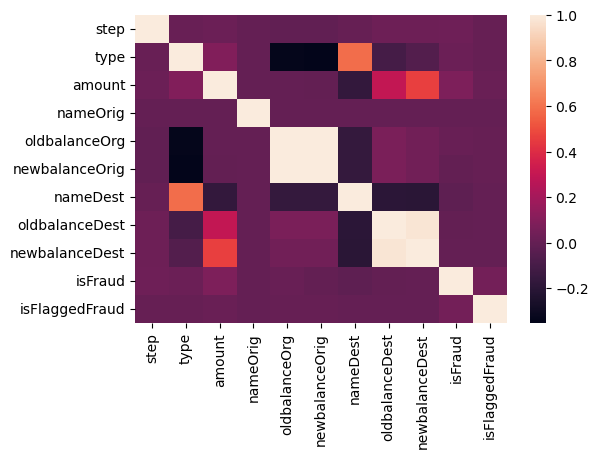

In [15]:
import seaborn as sb
plt.figure(figsize=(6,4))
sb.heatmap(cor)

In [16]:
df1=df.drop(columns=['isFlaggedFraud','nameDest','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1)

In [17]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,isFraud
0,1,3,9839.64,757869,170136.0,0
1,1,3,1864.28,2188998,21249.0,0
2,1,4,181.00,1002156,181.0,1
3,1,1,181.00,5828262,181.0,1
4,1,3,11668.14,3445981,41554.0,0


In [18]:
df['type'].head()

0    3
1    3
2    4
3    1
4    3
Name: type, dtype: int32

In [19]:
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


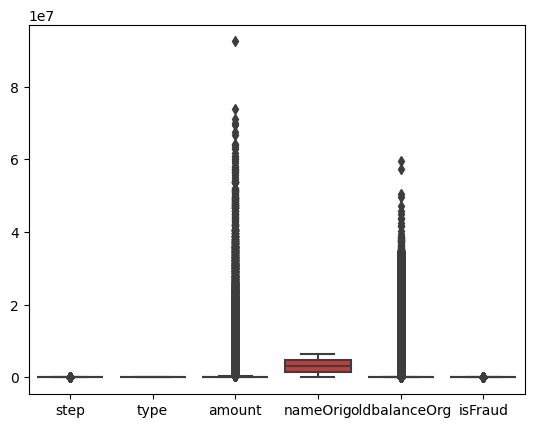

In [20]:
sb.boxplot(df1)
plt.show()

In [21]:
pd.DataFrame(df1.columns)

,0
0,step
1,type
2,amount
3,nameOrig
4,oldbalanceOrg
5,isFraud


In [22]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,isFraud
0,1,3,9839.64,757869,170136.0,0
1,1,3,1864.28,2188998,21249.0,0
2,1,4,181.00,1002156,181.0,1
3,1,1,181.00,5828262,181.0,1
4,1,3,11668.14,3445981,41554.0,0


In [23]:
df1.describe()

,step,type,amount,nameOrig,oldbalanceOrg,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,1.798619e+05,3.176678e+06,8.338831e+05,1.290820e-03
std,1.423320e+02,1.350117e+00,6.038582e+05,1.834064e+06,2.888243e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,1.588332e+06,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,3.176672e+06,1.420800e+04,0.000000e+00
75%,3.350000e+02,3.000000e+00,2.087215e+05,4.765048e+06,1.073152e+05,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,6.353306e+06,5.958504e+07,1.000000e+00


In [24]:
# # Finding the skewness to decide the method for outlier treatment
print('oldbalanceOrg = ',df1['oldbalanceOrg'].skew())
print('isFraud =',df1['isFraud'].skew())
print('nameOrig =',df1['nameOrig'].skew())
print('step =',df1['step'].skew())
print('type =',df1['type'].skew())

oldbalanceOrg =  5.249136420603121
isFraud = 27.779538153063452
nameOrig = -1.645270243414976e-05
step = 0.37517688846984765
type = 0.19653023973453335


In [25]:
# for outlier treatment
## REMOVING OUTLIER USING 'INTER QUARTILE RANGE' IN COLUMNS HAVING

In [26]:
df1.head()


,step,type,amount,nameOrig,oldbalanceOrg,isFraud
0,1,3,9839.64,757869,170136.0,0
1,1,3,1864.28,2188998,21249.0,0
2,1,4,181.00,1002156,181.0,1
3,1,1,181.00,5828262,181.0,1
4,1,3,11668.14,3445981,41554.0,0


In [27]:
# Removing outliers using Inter Quartile Range in columns having high skewness
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df1 = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

outlier_columns = ['oldbalanceOrg', 'amount', 'newbalanceDest', 'isFlaggedFraud']

dataset1 = remove_outliers_iqr(df, outlier_columns)


In [28]:
import numpy as np

In [29]:

#removing outliers using Inter Quartile Range in columns having low skewness
def remove_outliers_z_score(dataset1, columns, threshold=3):
    for column in columns:
        mean = dataset1[column].mean()
        std = dataset1[column].std()
        z_scores = (dataset1[column] - mean) / std
        dataset1 = dataset1[np.abs(z_scores) <= threshold]
    return dataset1

column_to_remove_outlier = ['step']
clean_data = remove_outliers_z_score(dataset1, column_to_remove_outlier)


In [30]:
clean_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6295995,670,3,8868.80,2096973,11556.00,2687.20,1953514,0.0,0.0,0,0
6295996,670,3,7343.33,6003247,152.00,0.00,1784922,0.0,0.0,0,0
6295997,670,3,3282.37,1690625,5954.00,2671.63,1362068,0.0,0.0,0,0
6295998,670,3,4527.98,1270341,2671.63,0.00,1305682,0.0,0.0,0,0


In [31]:
clean_data.corr()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006321,0.023808,0.000045,-0.007627,-0.007653,0.004383,0.029076,0.027453,0.023253,0.002132
type,0.006321,1.000000,0.088622,0.000145,-0.340152,-0.353016,0.584618,-0.104679,-0.059127,0.019863,0.002239
amount,0.023808,0.088622,1.000000,0.000087,-0.003964,-0.008223,-0.168971,0.296602,0.462305,0.070609,0.009183
nameOrig,0.000045,0.000145,0.000087,1.000000,-0.000625,-0.000651,-0.000239,0.000206,0.000213,-0.000428,0.000412
oldbalanceOrg,-0.007627,-0.340152,-0.003964,-0.000625,1.000000,0.998898,-0.162788,0.066353,0.041962,0.008693,0.002861
newbalanceOrig,-0.007653,-0.353016,-0.008223,-0.000651,0.998898,1.000000,-0.166599,0.067891,0.041813,-0.008232,0.002816
nameDest,0.004383,0.584618,-0.168971,-0.000239,-0.162788,-0.166599,1.000000,-0.198412,-0.204179,-0.020918,-0.000858
oldbalanceDest,0.029076,-0.104679,0.296602,0.000206,0.066353,0.067891,-0.198412,1.000000,0.976381,-0.005643,-0.000429
newbalanceDest,0.027453,-0.059127,0.462305,0.000213,0.041962,0.041813,-0.204179,0.976381,1.000000,0.000309,-0.000441
isFraud,0.023253,0.019863,0.070609,-0.000428,0.008693,-0.008232,-0.020918,-0.005643,0.000309,1.000000,0.038566


In [32]:
clean_data.corrwith(clean_data['isFraud']).sort_values(ascending=False)# from this we get to know the coorelative attributes



isFraud           1.000000
amount            0.070609
isFlaggedFraud    0.038566
step              0.023253
type              0.019863
oldbalanceOrg     0.008693
newbalanceDest    0.000309
nameOrig         -0.000428
oldbalanceDest   -0.005643
newbalanceOrig   -0.008232
nameDest         -0.020918
dtype: float64

In [33]:
print('dataset1=',dataset1.shape)
print('clean_data=',clean_data.shape)
print('df1=',df1.shape)
print(' df=' ,df.shape)

dataset1= (6362620, 11)
clean_data= (6296000, 11)
df1= (6362620, 6)
 df= (6362620, 11)


In [34]:
clean_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [35]:
x=clean_data.drop(columns=['isFraud','isFlaggedFraud','newbalanceDest','nameOrig','newbalanceOrig','oldbalanceDest','nameDest'])

In [36]:
x.head()

,step,type,amount,oldbalanceOrg
0,1,3,9839.64,170136.0
1,1,3,1864.28,21249.0
2,1,4,181.00,181.0
3,1,1,181.00,181.0
4,1,3,11668.14,41554.0


In [37]:
clean_data["isFraud"]

0          0
1          0
2          1
3          1
4          0
          ..
6295995    0
6295996    0
6295997    0
6295998    0
6295999    0
Name: isFraud, Length: 6296000, dtype: int64

In [38]:
y=clean_data['isFraud']


In [39]:
y=y.fillna(y.median())

In [40]:
x.head()

,step,type,amount,oldbalanceOrg
0,1,3,9839.64,170136.0
1,1,3,1864.28,21249.0
2,1,4,181.00,181.0
3,1,1,181.00,181.0
4,1,3,11668.14,41554.0


In [41]:
# splitting the data in train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
x_test['oldbalanceOrg']=x_test['oldbalanceOrg'].fillna(x_test['oldbalanceOrg'].mean())

In [42]:
#pridicting the y_test values
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
x_test.isnull().sum()

step             0
type             0
amount           0
oldbalanceOrg    0
dtype: int64

In [44]:
y


0          0
1          0
2          1
3          1
4          0
          ..
6295995    0
6295996    0
6295997    0
6295998    0
6295999    0
Name: isFraud, Length: 6296000, dtype: int64

In [45]:
acurracy=accuracy_score(y_test,y_pred)
acurracy

0.9992606416772554

In [46]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[1257257     449]
 [    482    1012]]


In [47]:
#Finding the training data accuracy
bias=clf.score(x_train, y_train)
bias

1.0

In [48]:

#finding the testing data accuracy
variance=clf.score(x_test,y_test)
variance


0.9992606416772554

In [49]:
features = np.array([[16,	1	,153898.58,	54663.0]])
print(clf.predict(features))

[0]


C:\Users\Rohith\Python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [50]:
eatures = np.array([[	14,	3,	6080.01,	0.0]])
print(clf.predict(features))

[0]


C:\Users\Rohith\Python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [51]:
clean_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [52]:
from joblib import dump
model=dump(clf,'FRAUD DETECTION.joblib')
model

['FRAUD DETECTION.joblib']

In [53]:

from joblib import load
model=load('FRAUD DETECTION.joblib')
model.predict([[3,1,0,1]])


C:\Users\Rohith\Python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [54]:
from sklearn.preprocessing import LabelEncoder


In [55]:
x=df.groupby('type')['isFraud'].sum()
labels=['PAYMENT','CASH_OUT','CASH_IN','TRANSFER','DEBIT']


In [56]:
x

type
0       0
1    4116
2       0
3       0
4    4097
Name: isFraud, dtype: int64

Text(0.5, 1.0, 'FRAUD RATIO AMOUNGS THE CATEGORY')

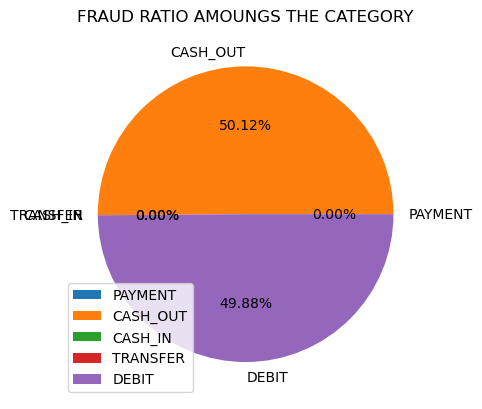

In [57]:
plt.pie(x,labels=labels,autopct='%.2f%%')
plt.legend()
plt.title('FRAUD RATIO AMOUNGS THE CATEGORY')# HERE WE CAN SEE THAT THE MAX FRAUDS PRESENT IN TRANSEFER AND CASH_IN

In [58]:
df['type'].value_counts().sort_values(ascending=True)

type
2      41432
4     532909
0    1399284
3    2151495
1    2237500
Name: count, dtype: int64

In [59]:
types=['PAYMENT','CASH_OUT','CASH_IN','TRANSFER','DEBIT']

In [60]:
x=[353873,373641,227130,86753,7178]

<function matplotlib.pyplot.show(close=None, block=None)>

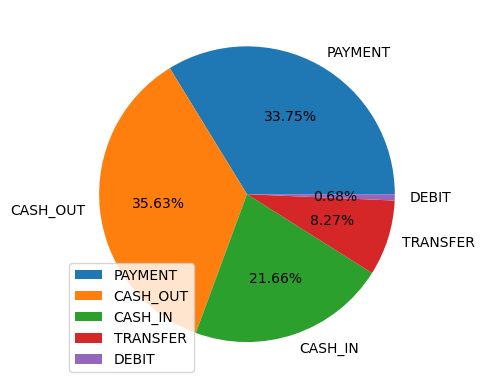

In [61]:
plt.pie(x,labels=types,autopct='%.2f%%')
plt.legend()
plt.show

<BarContainer object of 5 artists>

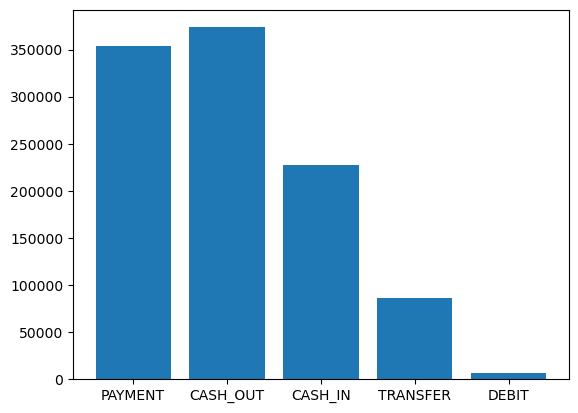

In [62]:
plt.bar(types,height=[ 353873,373641,227130,86753,7178])

In [63]:
df['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

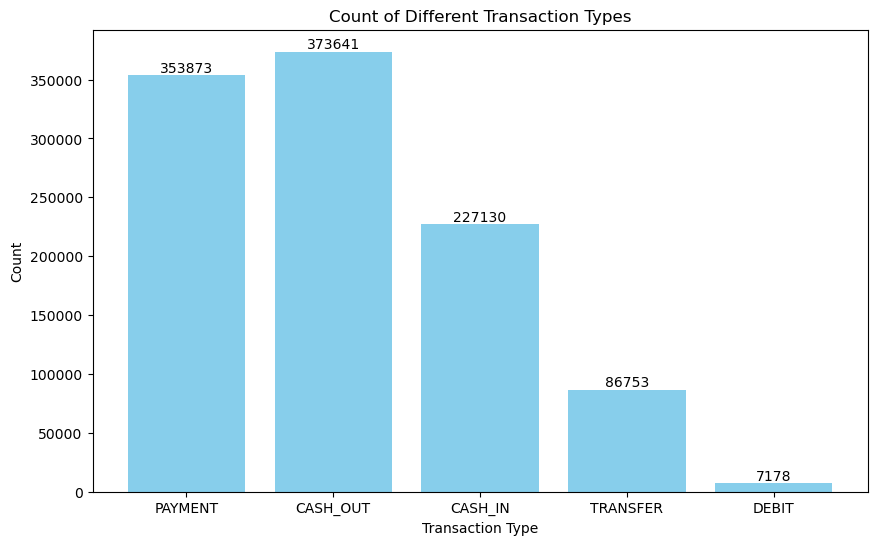

In [64]:
import matplotlib.pyplot as plt

types = ['PAYMENT', 'CASH_OUT', 'CASH_IN', 'TRANSFER', 'DEBIT']
counts = [ 353873,373641,227130,86753,7178]

plt.figure(figsize=(10, 6))
bars = plt.bar(types, counts, color='skyblue')

# Add values on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom')

plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Count of Different Transaction Types')
plt.show()


Text(0, 0.5, 'AMOUNT')

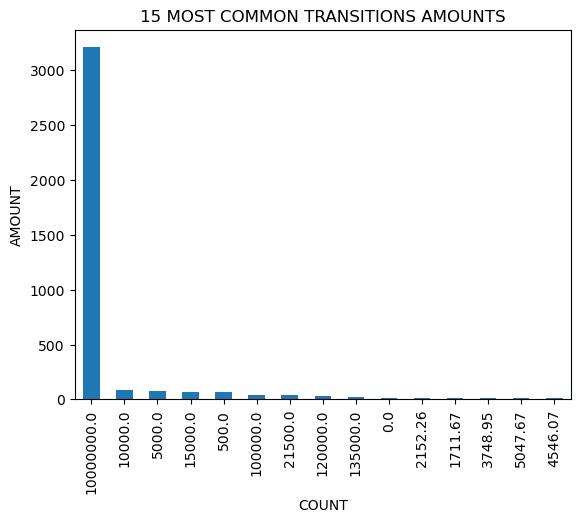

In [65]:
df['amount'].value_counts().head(15).plot.bar()
plt.title('15 MOST COMMON TRANSITIONS AMOUNTS')
plt.xlabel('COUNT')
plt.ylabel('AMOUNT')

In [66]:
print("Transfer Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 4)].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 4)].amount.max())
print("\nCASH_OUT Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 1)].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 1)].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


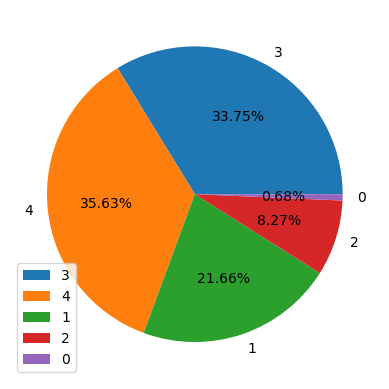

In [67]:
df['isFraud'].value_counts()# HERE WE HAVE 84 FRAUD
import matplotlib.pyplot as plt
labels=df['type'].unique()
plt.pie(x,labels=df['type'].unique(),autopct='%.2f%%')
plt.legend()# we can find that the mazority of the transfer
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


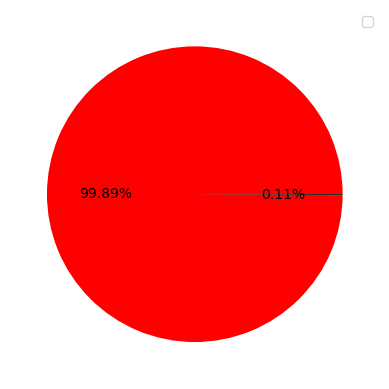

In [68]:
size=[1047433,1142]
labels=['NOT A FRAUD','FRAUD']
plt.pie(size,autopct='%.2f%%',colors=['red','black'])
plt.legend()
plt.show()# we have only 0.11% frauds from overall dataset
